## Student Performance In Exams  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

## Import Csv Data

In [2]:
df = pd.read_csv('stud.csv')

## Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

###
## Info About Dataset
1) parentel_level_of education -> ["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school']

2) lunch -> standard or free/reduced
3) gender -> male / female 
4) math score -> score in maths
5) reading score -> score in reading
6) writing score -> score in writing 
7) race_ethnicity -> ['group B', 'group C', 'group A', 'group D', 'group E' ]
8) test_preparation_course -> complete or not completed. 

In [5]:
# df['parental_level_of_education'].unique()
# df['test_preparation_course'].unique()

## Check For Missing Values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check Duplicate Values

In [7]:
df.duplicated().sum()

np.int64(0)

1) No missing values
2) No duplicate Values

## Check Number of Unique values for each Column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### See Basic Statistics

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1) Minimum Score for Reading and Writing is Larger than Math 
2) Standard Deviations of scores are Close to each other and Average Scores are also Close to Each other
3) Score is graded on total of 100 

## EDA

In [10]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [11]:
## Categorical and Numerical Features
cat_features = df.select_dtypes(include='object').columns.tolist()
num_features = df.select_dtypes(exclude='object').columns.tolist()
print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding Some columns Like Total Score and Average Score 

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/len(num_features)

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## How many Students Got Full Marks 

In [13]:
print('reading_score full marks students ', df[df['reading_score']==100]['average'].count())
print('writing_score full marks students ', df[df['writing_score']==100]['average'].count())
print('math_score full marks students ', df[df['math_score']==100]['average'].count())

reading_score full marks students  17
writing_score full marks students  14
math_score full marks students  7


## How many Students got less than 30 marks in subjects

In [14]:
print('reading_score fail marks students ', df[df['reading_score']<=30]['average'].count())
print('writing_score fail marks students ', df[df['writing_score']<=30]['average'].count())
print('math_score fail marks students ', df[df['math_score']<=30]['average'].count())

reading_score fail marks students  8
writing_score fail marks students  10
math_score fail marks students  16


## 
1) Students Performed Worse In Math 
2) Students Performed better in reading and Writing  

### Visualizations 

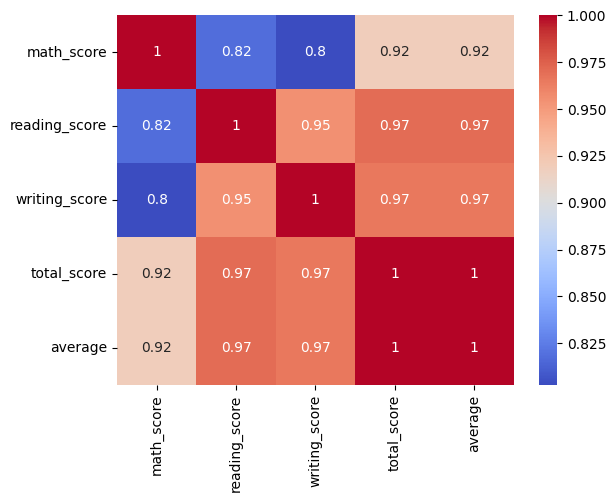

In [17]:
import seaborn as sns
sns.heatmap(data = df.corr(numeric_only=True) ,annot=True , cmap = 'coolwarm' , )
plt.show()

#### Columns are Very Strongly Co-related Indicating that columns are Inter-related